In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
df=pd.read_csv("/content/revenue_prediction.csv")

In [87]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [88]:
df.drop(["Id"],axis=1,inplace=True)

In [89]:
df

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...
95,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          100 non-null    object 
 1   Franchise     100 non-null    object 
 2   Category      100 non-null    object 
 3   City          100 non-null    object 
 4   No_Of_Item    100 non-null    int64  
 5   Order_Placed  100 non-null    float64
 6   Revenue       100 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [91]:
# Data Cleansing
df.isnull().sum()

Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [92]:
df.duplicated().sum()

0

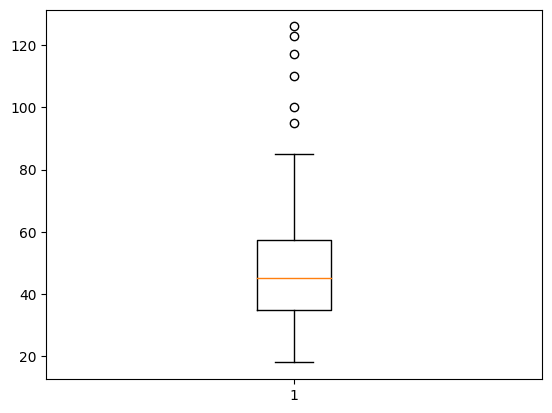

In [93]:
# Outliers
plt.boxplot(df["No_Of_Item"])
plt.show()

In [94]:
p1=df["No_Of_Item"].quantile(0.01)
p2=df["No_Of_Item"].quantile(0.99)
print(p1,p2)

18.99 123.03000000000002


In [95]:
df["No_Of_Item"][df["No_Of_Item"]<p1]=p1
df["No_Of_Item"][df["No_Of_Item"]>p2]=p2


<ipython-input-95-1f67f5b94f4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No_Of_Item"][df["No_Of_Item"]<p1]=p1


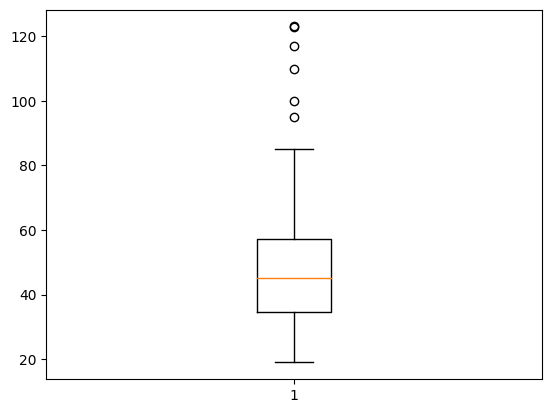

In [96]:
# Outliers
plt.boxplot(df["No_Of_Item"])
plt.show()

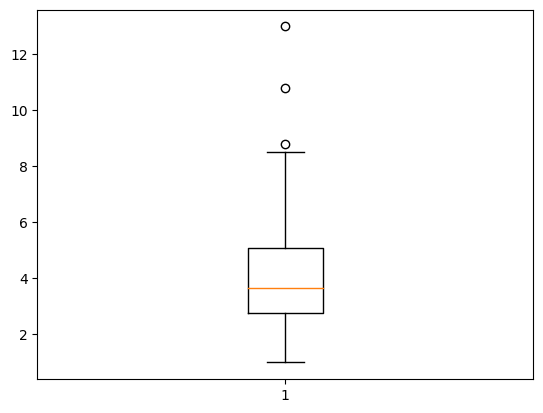

In [97]:
# Outliers
plt.boxplot(df["Order_Placed"])
plt.show()


In [98]:
p1=df["Order_Placed"].quantile(0.01)
p2=df["Order_Placed"].quantile(0.99)
df["Order_Placed"][df["Order_Placed"]<p1]=p1
df["Order_Placed"][df["Order_Placed"]>p2]=p2


<ipython-input-98-47d2e58df7c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order_Placed"][df["Order_Placed"]<p1]=p1
<ipython-input-98-47d2e58df7c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order_Placed"][df["Order_Placed"]>p2]=p2


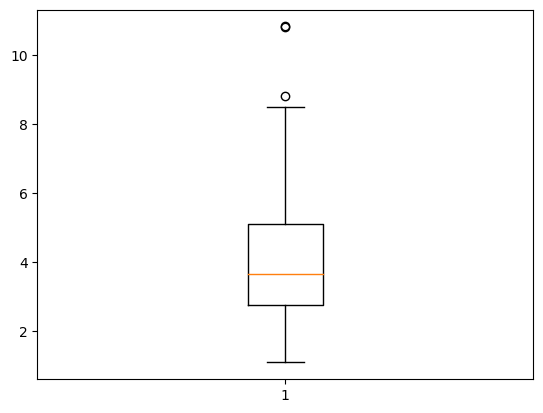

In [99]:
# Outliers
plt.boxplot(df["Order_Placed"])
plt.show()


In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le=LabelEncoder()

In [102]:
df.columns

Index(['Name', 'Franchise', 'Category', 'City', 'No_Of_Item', 'Order_Placed',
       'Revenue'],
      dtype='object')

In [103]:
for col in df.columns:
  if df[col].dtype=="object":
    df[col]=le.fit_transform(df[col])

In [104]:
df

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,40,1,12,0,55.00,5.5,5953753
1,14,0,19,1,72.00,6.8,7223131
2,16,1,5,4,25.00,1.9,2555379
3,60,1,11,2,18.99,2.5,2175511
4,68,1,13,3,48.00,4.2,4816715
...,...,...,...,...,...,...,...
95,96,0,11,0,19.00,1.1,1270499
96,47,1,19,0,75.00,6.3,6412623
97,35,1,19,1,77.00,6.2,6694797
98,41,1,17,4,25.00,2.1,2344689


In [105]:
# feature Selction
df.corr()

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
Name,1.000000,0.026113,0.088829,-0.112822,0.251078,0.249703,0.246611
Franchise,0.026113,1.000000,-0.129565,0.119937,0.008786,0.024776,0.048881
Category,0.088829,-0.129565,1.000000,0.072629,0.075159,0.053891,-0.036955
City,-0.112822,0.119937,0.072629,1.000000,-0.108717,-0.122063,-0.162427
No_Of_Item,0.251078,0.008786,0.075159,-0.108717,1.000000,0.977710,0.890275
Order_Placed,0.249703,0.024776,0.053891,-0.122063,0.977710,1.000000,0.918832
Revenue,0.246611,0.048881,-0.036955,-0.162427,0.890275,0.918832,1.000000


In [106]:
import seaborn as sns

<Axes: >

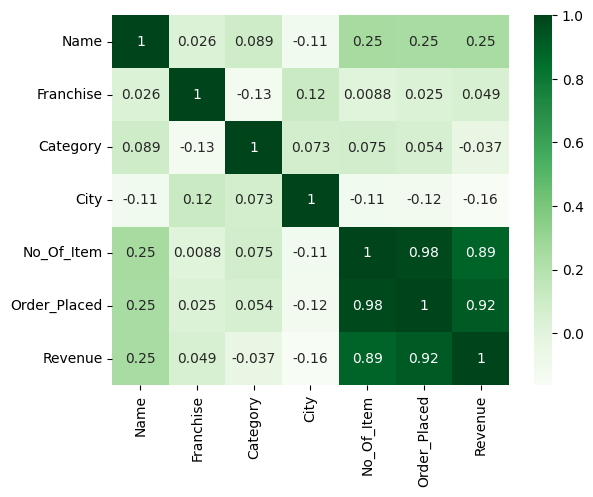

In [107]:
sns.heatmap(df.corr(),cmap="Greens",annot=True)

In [108]:
selected_col=["Order_Placed","No_Of_Item"]

In [109]:
# split the data into independent and dependent
x=df[selected_col]

In [110]:
x

,Order_Placed,No_Of_Item
0,5.5,55.00
1,6.8,72.00
2,1.9,25.00
3,2.5,18.99
4,4.2,48.00
...,...,...
95,1.1,19.00
96,6.3,75.00
97,6.2,77.00
98,2.1,25.00


In [111]:
y=df["Revenue"]


In [112]:
y =pd.DataFrame(y)
y

,Revenue
0,5953753
1,7223131
2,2555379
3,2175511
4,4816715
...,...
95,1270499
96,6412623
97,6694797
98,2344689


In [113]:
# splitting the data into train test split

In [114]:
from sklearn.model_selection import train_test_split


In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=56)

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lin_model=LinearRegression()

In [118]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [119]:

lin_pred=lin_model.predict(x_test)
lin_pred

array([[ 7468991.41988773],
       [ 6937999.3316447 ],
       [ 2764879.6561561 ],
       [ 3798234.17022611],
       [ 1200533.05384308],
       [ 5847385.4927426 ],
       [ 3170281.13794239],
       [ 5503829.54375   ],
       [ 3432534.30764842],
       [ 5961904.1424068 ],
       [ 4609037.13379867],
       [ 3952454.4390989 ],
       [ 3141651.47552634],
       [ 5556502.66062052],
       [ 1720453.18529356],
       [ 1663193.86046146],
       [ 1943004.735791  ],
       [ 5710722.92949332],
       [ 1720453.18529356],
       [ 3884123.15747426],
       [ 6836452.17964243],
       [ 5459541.71657983],
       [ 7691542.97038517],
       [ 1971634.39820705],
       [ 3769604.50781006],
       [ 4734627.74025541],
       [12673419.76747887],
       [ 4426187.20250983],
       [ 8947449.03495261],
       [ 6413492.99223264]])

In [120]:
y_test

,Revenue
92,6782425
79,6313221
23,1999068
68,3836721
52,1763231
38,5461700
73,3347767
9,4544227
59,3600467
27,6135276


In [121]:
from sklearn.metrics import *

In [122]:
r2_score(y_test,lin_pred)

0.8777650370616852

In [123]:
MSE = mean_squared_error(y_test,lin_pred)
MSE

911069627782.8511

In [124]:
RMSE=np.sqrt(MSE)

In [125]:
RMSE

954499.674061155

In [126]:
# Let's Try with Decision Tree Regressor

In [127]:
from sklearn.tree import DecisionTreeRegressor

In [128]:
dt_model=DecisionTreeRegressor()

In [129]:
dt_model.fit(x_train,y_train)
dt_model=dt_model.predict(x_test)
dt_model

array([ 6412623.,  6694797.,  3164972.,  2778621.,  1904842.,  5025735.,
        3258837.,  5025735.,  2778621.,  5595267.,  4182531.,  4066618.,
        3426169.,  5286212.,  1940289.,  1940289.,  2364478.,  5286212.,
        1940289.,  3945135.,  4952255.,  3861370.,  7223131.,  2344689.,
        2778621.,  4590423., 19696939.,  4136425.,  7513524.,  4952255.])

In [130]:
y_test

,Revenue
92,6782425
79,6313221
23,1999068
68,3836721
52,1763231
38,5461700
73,3347767
9,4544227
59,3600467
27,6135276


In [131]:
r2_score(y_test,dt_model)

0.8964649604113497

In [132]:
#Random Forest Regressor

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
Rf = RandomForestClassifier()

In [135]:
Rf.fit(x_train,y_train)

<ipython-input-135-ffb3b2f0b9ce>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rf.fit(x_train,y_train)


RandomForestClassifier()

In [136]:
y_pred = Rf.predict(x_test)
y_pred

array([ 6412623,  5906596,  3004429,  2778621,  1904842,  5025735,
        3258837,  5025735,  2778621,  5595267,  4264176,  4956086,
        3258837,  5286212,  1521934,  1521934,  2364478,  5286212,
        1521934,  3945135,  4554237,  3861370,  7223131,  2344689,
        2778621,  4136425, 19696939,  4136425,  7495092,  4952255])

In [137]:
y_test

,Revenue
92,6782425
79,6313221
23,1999068
68,3836721
52,1763231
38,5461700
73,3347767
9,4544227
59,3600467
27,6135276


In [150]:
r2_score(y_test,y_pred)

0.8743165778510728

In [ ]:
#---- end of project----

In [ ]:
# project with pycaret

In [1]:
!pip install pycaret

In [4]:
from pycaret.regression import *
import pandas as pd

In [5]:
df=pd.read_csv("/content/revenue_prediction.csv")

In [6]:
reg_setup=setup(df[["Order_Placed","No_Of_Item","Revenue"]],target="Revenue",session_id=123)

,Description,Value
0,Session id,123
1,Target,Revenue
2,Target type,Regression
3,Original data shape,"(100, 3)"
4,Transformed data shape,"(100, 3)"
5,Transformed train set shape,"(70, 3)"
6,Transformed test set shape,"(30, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [7]:
all_model=compare_models()
print(all_model)
best_model = automl(optimize='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,542080.7506,1580872745999.1189,864278.3926,0.8191,0.1823,0.1368,0.0300
par,Passive Aggressive Regressor,560199.8978,1575288046271.4939,878995.2733,0.8097,0.1886,0.1444,0.0210
ridge,Ridge Regression,580778.8732,1543868465271.9316,899571.9147,0.8052,0.1975,0.1331,0.0400
lr,Linear Regression,587427.6607,1536562123755.3250,904717.0302,0.8034,0.2194,0.1393,1.1520
lasso,Lasso Regression,587426.5643,1536561860032.5361,904715.8329,0.8034,0.2194,0.1393,0.0380
lar,Least Angle Regression,587427.3018,1536561901542.4128,904716.5289,0.8034,0.2194,0.1393,0.0200
llar,Lasso Least Angle Regression,587429.7804,1536564041999.3120,904719.8292,0.8034,0.2194,0.1393,0.0200
ada,AdaBoost Regressor,581065.0361,2220476101888.0498,919060.6987,0.7946,0.1992,0.1487,0.0670
rf,Random Forest Regressor,612505.7048,2346240775771.3760,987090.4811,0.7691,0.2046,0.1488,0.1640
en,Elastic Net,626126.8018,1793720902534.0454,985485.1071,0.7629,0.2022,0.1438,0.0230


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

HuberRegressor()


In [8]:
best_model

HuberRegressor()